In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.3 MB/s eta 0:00:00


In [3]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import os
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import matplotlib.pyplot as plt
plt.style.use ('dark_background')
import seaborn as sns


In [7]:

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Project News Detection/WELFake_Dataset.csv');
df.shape

df = df.dropna();
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [ ]:
sampled_df = df.sample(frac=0.6) # Get 60% of the data
len(sampled_df)                  # check length]
sampled_df.index = range(0, len(sampled_df))
sampled_df.shape
sampled_df = sampled_df.dropna();
sampled_df.head()

,Unnamed: 0,title,text,label
0,66877,"Aiming to sidestep Apple dispute, Obama makes ...","AUSTIN, Texas (Reuters) - U.S. President Barac...",0
1,51905,Countdown to Brexit breakthrough?,BRUSSELS (Reuters) - Here is a timeline of the...,0
2,1242,Adele helps pregnant mothers by telling them; ...,,1
3,60119,Mitt Romney says Donald Trump will change Amer...,"Park City, Utah (CNN)Mitt Romney suggested Fri...",0
4,23180,SNIVELING COWARDS AT CNN Caught Editing Trump ...,If the Republican Party really cared about win...,1


Text(0.5, 1.0, 'Distribution of Fake - 0 /Real - 1 News')

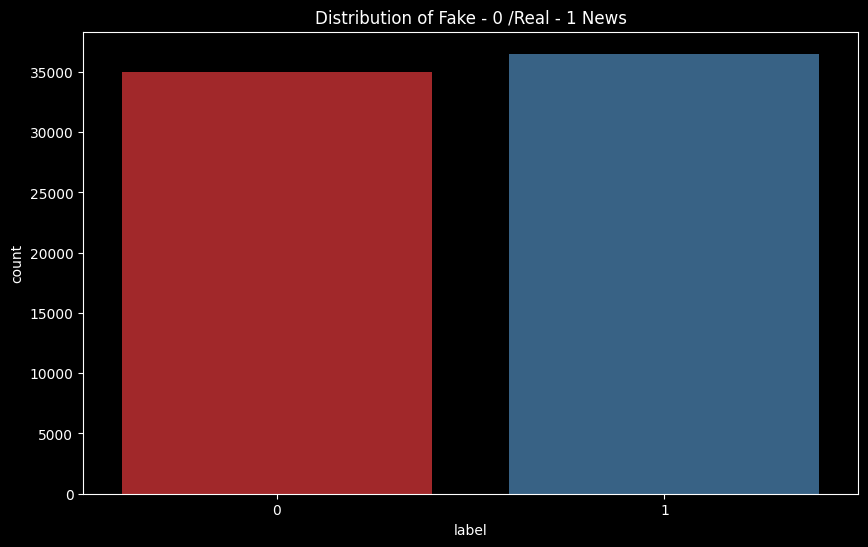

In [9]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize = (10,6))
sns.countplot(x = df['label'], palette = 'Set1', alpha = 0.8)
plt.title('Distribution of Fake - 0 /Real - 1 News')

Text(0.5, 1.0, 'Distribution of the News Words count')

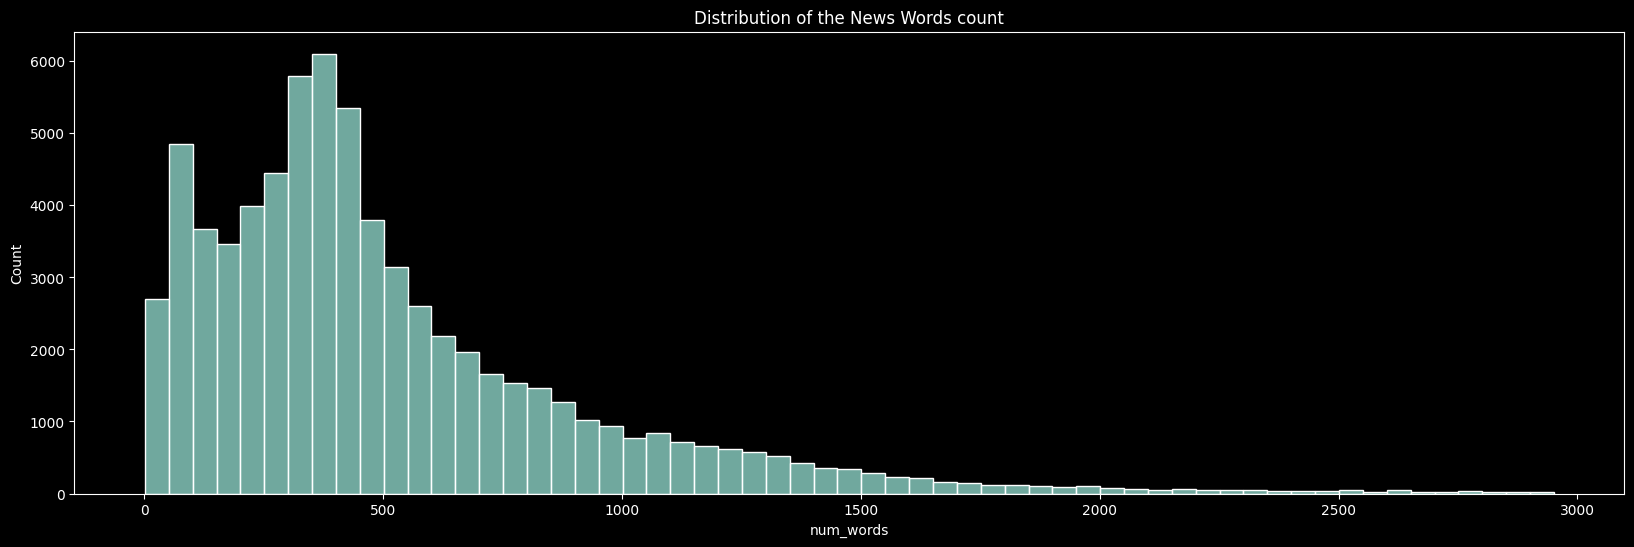

In [10]:
plt.figure(figsize = (20,6))
sns.histplot(df['num_words'], bins = range(1, 3000, 50), palette = 'Set1', alpha = 0.8)
plt.title('Distribution of the News Words count')

In [11]:
labels = df.label
labels.head()

0    1
2    1
3    0
4    1
5    1
Name: label, dtype: int64

In [13]:
import numpy as np
import re
import collections
import contractions
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

def remove_tags(string):
    #removelist = ""
    string = re.sub(r"\. \. \.", "\.", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`\.]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " ( ", string)
    string = re.sub(r"\)", " ) ", string)
    string = re.sub(r"\?", " ? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    result = re.sub('https://.*','',string)
    return string.strip().lower()
    return result
df['text']= df['text'].apply(lambda cw : remove_tags(cw))
df


,Unnamed: 0,title,text,label,num_words
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,no comment is expected from barack obama membe...,1,871
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"now , most of the demonstrators gathered last ...",1,34
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",a dozen politically active pastors came here f...,0,1321
4,4,SATAN 2: Russia unvelis an image of its terrif...,"the rs 28 sarmat missile , dubbed satan 2 , wi...",1,329
5,5,About Time! Christian Group Sues Amazon and SP...,all we can say on this one is it s about time ...,1,244
...,...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,washington ( reuters ) hackers believed to be ...,0,735
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"you know , because in fantasyland republicans ...",1,604
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,migrants refuse to leave train at refugee camp...,0,477
72132,72132,Trump tussle gives unpopular Mexican leader mu...,mexico city ( reuters ) donald trump s combati...,0,559


In [14]:
import re
import string
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
def clean_Special_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove non-text data
    text = re.sub(r'\S*@\S*\s?', '', text)  # remove email addresses
    text = re.sub(r'http\S+', '', text)    # remove URLs
    text = re.sub(r'\d+', '', text)        # remove numbers

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s\$\%\&\*\@\-\+\=\[\]\{\}\:\;\|\\\\\<\>\?\!\#\~\(\)\.\,\^\/\´\`\¨\ª\º\€\$\£\¥\¢\₹]', '', text)
    text = re.sub(r'_', ' ', text)

    return text


In [16]:
def clean_stop_text(text):
   # Convert to lowercase
    text = text.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [w for w in words if not w in stop_words]
    text = ' '.join(words)

    return text

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
df["text"] = df["text"].apply(clean_Special_text)

In [20]:
df["text"] = df["text"].apply(clean_stop_text)
df

,Unnamed: 0,title,text,label,num_words
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,comment expected barack obama members fyf fuky...,1,871
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,", demonstrators gathered last night exercising...",1,34
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",dozen politically active pastors came private ...,0,1321
4,4,SATAN 2: Russia unvelis an image of its terrif...,"rs sarmat missile , dubbed satan , replace ss ...",1,329
5,5,About Time! Christian Group Sues Amazon and SP...,say one time someone sued southern poverty law...,1,244
...,...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,washington ( reuters ) hackers believed workin...,0,735
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"know , fantasyland republicans never questione...",1,604
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,migrants refuse leave train refugee camp hunga...,0,477
72132,72132,Trump tussle gives unpopular Mexican leader mu...,mexico city ( reuters ) donald trump combative...,0,559


In [21]:
from google.colab import files
df.to_csv('output3.csv', encoding = 'utf-8-sig') 
files.download('output3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
df = pd.read_csv('/content/drive/MyDrive/Project News Detection/output3.csv');
df.shape

df = df.dropna();
df.head()

,Unnamed: 0.1,Unnamed: 0,title,text,label,num_words
0,0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,comment expected barack obama members fyf fuky...,1,871
1,2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,", demonstrators gathered last night exercising...",1,34
2,3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",dozen politically active pastors came private ...,0,1321
3,4,4,SATAN 2: Russia unvelis an image of its terrif...,"rs sarmat missile , dubbed satan , replace ss ...",1,329
4,5,5,About Time! Christian Group Sues Amazon and SP...,say one time someone sued southern poverty law...,1,244


In [24]:
news_articles = df['text'].tolist()
labels = df['label'].tolist()


In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

In [28]:
# Assuming you have a list of news articles in a variable called `news_articles`

# Set the maximum number of words to keep and maximum sequence length
max_words = 4000
max_length = 500

# Tokenize the text
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(news_articles)
word_index = tokenizer.word_index

# Convert the text to sequences and perform padding
sequences = tokenizer.texts_to_sequences(news_articles)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding="post", truncating="post")


In [ ]:
from sklearn.model_selection import train_test_split

train_ratio = 0.6
test_ratio = 0.2
validation_ratio = 0.2

X_train, X_test_val, y_train, y_test_val = train_test_split(padded_sequences, labels, test_size=test_ratio + validation_ratio, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=validation_ratio/(test_ratio + validation_ratio), random_state=42)


In [ ]:
# Import necessary libraries
import pandas as pd
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Pad sequences
max_length = 500

# Build LSTM model
embedding_dim = 128

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(embedding_dim, return_sequences=True),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          512000    
                                                                 
 lstm (LSTM)                 (None, 500, 128)          131584    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                        

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Mar 26 16:15:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W /  70W |    345MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
import numpy as np

y_train = np.array(y_train)
y_val = np.array(y_val)

epochs = 10
batch_size = 64

history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val)
)



Epoch 1/10
399/399 [==============================] - 57s 123ms/step - loss: 0.3378 - accuracy: 0.8555 - val_loss: 0.1722 - val_accuracy: 0.9294
Epoch 2/10
399/399 [==============================] - 24s 60ms/step - loss: 0.1212 - accuracy: 0.9552 - val_loss: 0.1041 - val_accuracy: 0.9609
Epoch 3/10
399/399 [==============================] - 16s 41ms/step - loss: 0.0798 - accuracy: 0.9734 - val_loss: 0.1191 - val_accuracy: 0.9508
Epoch 4/10
399/399 [==============================] - 14s 35ms/step - loss: 0.0579 - accuracy: 0.9820 - val_loss: 0.1113 - val_accuracy: 0.9591
Epoch 5/10
399/399 [==============================] - 12s 29ms/step - loss: 0.0395 - accuracy: 0.9872 - val_loss: 0.1155 - val_accuracy: 0.9639
Epoch 6/10
399/399 [==============================] - 12s 31ms/step - loss: 0.0252 - accuracy: 0.9930 - val_loss: 0.1226 - val_accuracy: 0.9642
Epoch 7/10
399/399 [==============================] - 11s 28ms/step - loss: 0.0166 - accuracy: 0.9954 - val_loss: 0.1437 - val_accuracy

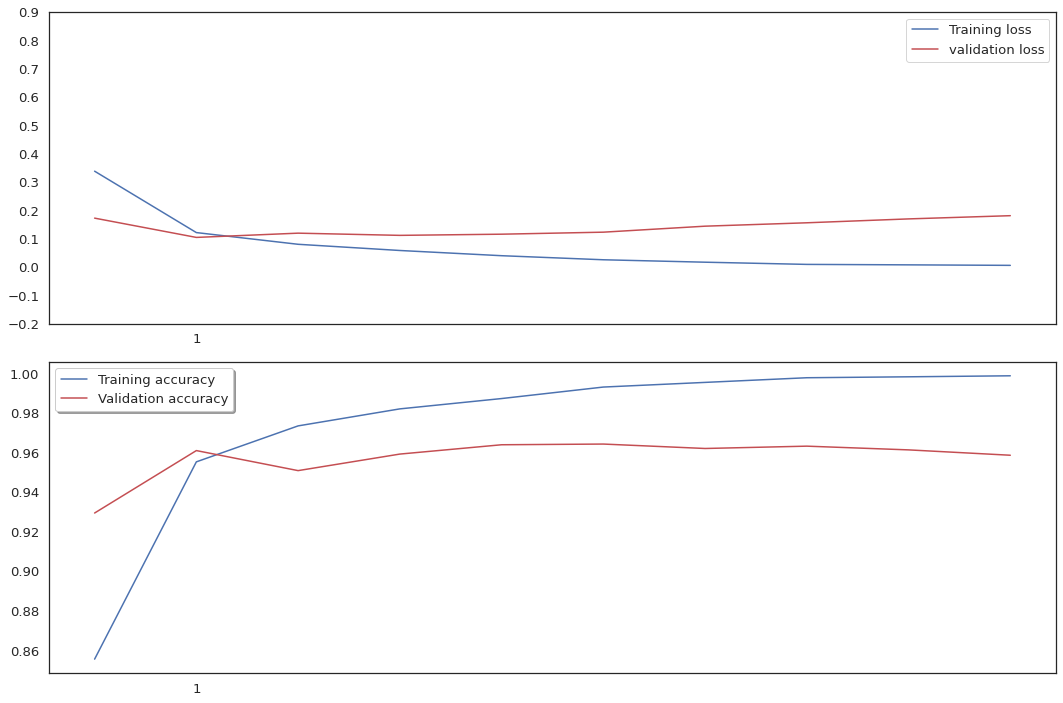

In [ ]:
epochs=10
sns.set(style='white', font_scale=1.2)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 10))
ax1.set_yticks(np.arange(-0.2, 1, 0.1))
ax1.legend()

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 10))
ax2.legend()

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
model.save_weights('/content/drive/MyDrive/Project News Detection/model/model_LSTM_2_weights.h5')
model.save('/content/drive/MyDrive/Project News Detection/model/model__LSTM_2_architecture.h5')

In [ ]:

import pickle
import os

filename = 'LSTM.pkl'
path = '/content/drive/MyDrive/Project News Detection/model/' + filename

with open(path, 'wb') as file:
    pickle.dump(model, file)

# Check if the file was saved correctly
if os.path.exists(path):
    print('Model saved successfully to Google Drive:', path)
else:
    print('Error: Model could not be saved to Google Drive.')


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......embedding
.........vars
............0
......global_max_pooling1d
.........vars
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-03-26 16:19:00           64
config.json                                    2

In [ ]:
filename = 'LSTM.pkl'
path = '/content/drive/MyDrive/Project News Detection/model/' + filename

with open(path, 'rb') as file:
    loaded_model = pickle.load(file)

Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-03-26 16:19:00           64
config.json                                    2023-03-26 16:19:00         2944
variables.h5                                   2023-03-26 16:19:00      7856088
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......embedding
.........vars
............0
......global_max_pooling1d
.........vars
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.......

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions on testing data
y_pred = loaded_model.predict(X_test)
print(y_pred)

# Convert predicted probabilities to predicted classes
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Calculate accuracy score and confusion matrix
acc_score = accuracy_score(y_test, y_pred_classes)
cm = confusion_matrix(y_test, y_pred_classes)

print('Accuracy Score:', acc_score)
print('Confusion Matrix:\n', cm)


266/266 [==============================] - 2s 7ms/step
[[1.0000000e+00]
 [1.0000000e+00]
 [9.9999988e-01]
 ...
 [9.9952519e-01]
 [2.3847315e-05]
 [1.0000000e+00]]
Accuracy Score: 0.9637348404568468
Confusion Matrix:
 [[3986  159]
 [ 149 4199]]


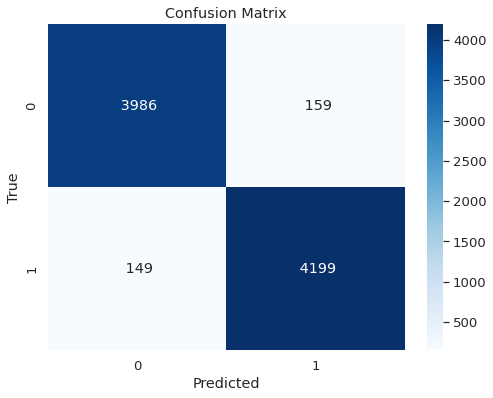

In [ ]:
# Plot the confusion matrix using Seaborn's heatmap function
plt.figure(figsize=(8, 6))
sns.set(style='white', font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True, fmt=' ', cmap='Blues')

# Customize the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
#Print classification report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4145
           1       0.96      0.97      0.96      4348

    accuracy                           0.96      8493
   macro avg       0.96      0.96      0.96      8493
weighted avg       0.96      0.96      0.96      8493



In [ ]:
# Input text (Fake News)
  news_articles = [
    "Demonstrators gathered last night exercising constitutional protected right peaceful protest order raise issues create change.",
    "president donald trump returned attacks biased media , weekend away washington d. c. fake media ( real media ) gotten even worse since election , wrote twitter . every story badly slanted . hold truth ! last week , media surprised trump referred honorable people event white house . trump appeared watching fox friends monday morning , praising show analysis . first days presidency exposed total failure last eight years foreign policy ! wrote . true .",
    "tentative deal reached weekend presidential campaigns hillary clinton bernie sanders includes debate thursday university new hampshire durham . msnbc announced sunday host debate , scheduled p.m. eastern chuck todd rachel maddow moderating . new hampshire first nation primary feb. . clinton sanders tight race monday iowa caucuses , clinton trails vermont senator new hampshire , raising possibility democratic front runner could lose first two contests . former maryland gov . martin omalley trailed wide margins . democratic national committee says reached agreement principal party sanction manage debates primary schedule , including new hampshire debate ."
]

# Loop over news articles and make predictions
  for article in news_articles:
      # Preprocess news article
      input_sequence = tokenizer.texts_to_sequences([article])
      input_padded = pad_sequences(input_sequence, maxlen=max_length, padding="post", truncating="post")

      # Make a prediction
      prediction = loaded_model.predict(input_padded)
      threshold = 0.5
      y_pred_one = np.where(prediction >= threshold, 1, 0)

      # Print prediction for current news article
      if y_pred_one == 0:
          print(f"The news article:\n\n{article}\n\nis predicted as FAKE with a probability of {1 - prediction[0][0]:.2f}")
      else:
          print(f"The news article:\n\n{article}\n\nis predicted as REAL with a probability of {prediction[0][0]:.2f}")
      print('-' * 80)

1/1 [==============================] - 0s 23ms/step
The news article:

Demonstrators gathered last night exercising constitutional protected right peaceful protest order raise issues create change.

is predicted as REAL with a probability of 1.00
--------------------------------------------------------------------------------
1/1 [==============================] - 0s 21ms/step
The news article:

president donald trump returned attacks biased media , weekend away washington d. c. fake media ( real media ) gotten even worse since election , wrote twitter . every story badly slanted . hold truth ! last week , media surprised trump referred honorable people event white house . trump appeared watching fox friends monday morning , praising show analysis . first days presidency exposed total failure last eight years foreign policy ! wrote . true .

is predicted as FAKE with a probability of 1.00
--------------------------------------------------------------------------------
1/1 [============